# IMPORTING REQUIRED MODULES

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression

%matplotlib inline
plt.style.use('seaborn')

# READING THE DATA

In [39]:
da=pd.read_csv("car data.csv")

In [40]:
da.shape

(301, 9)

In [41]:
da.info

<bound method DataFrame.info of         name  year  selling_Price  present_Price  km_driven fuel_type  \
0       ritz  2014           3.35           5.59      27000    Petrol   
1        sx4  2013           4.75           9.54      43000    Diesel   
2       ciaz  2017           7.25           9.85       6900    Petrol   
3    wagon r  2011           2.85           4.15       5200    Petrol   
4      swift  2014           4.60           6.87      42450    Diesel   
..       ...   ...            ...            ...        ...       ...   
296     city  2016           9.50          11.60      33988    Diesel   
297     brio  2015           4.00           5.90      60000    Petrol   
298     city  2009           3.35          11.00      87934    Petrol   
299     city  2017          11.50          12.50       9000    Diesel   
300     brio  2016           5.30           5.90       5464    Petrol   

    seller_type transmission  owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0  
2        Dealer       Manual      0  
3        Dealer       Manual      0  
4        Dealer       Manual      0  
..          ...          ...    ...  
296      Dealer       Manual      0  
297      Dealer       Manual      0  
298      Dealer       Manual      0  
299      Dealer       Manual      0  
300      Dealer       Manual      0  

[301 rows x 9 columns]>

In [42]:
da.isna().sum() #NUll values

name             0
year             0
selling_Price    0
present_Price    0
km_driven        0
fuel_type        0
seller_type      0
transmission     0
owner            0
dtype: int64

In [43]:
da['Age']=2022-da['year'] #adding age column
da.drop('year',axis=1,inplace=True) #dropping year column

In [44]:
da.columns #getting columns including age

Index(['name', 'selling_Price', 'present_Price', 'km_driven', 'fuel_type',
       'seller_type', 'transmission', 'owner', 'Age'],
      dtype='object')

In [45]:
clm=['fuel_type','seller_type','transmission','owner']

# DATA VISUALIZATION

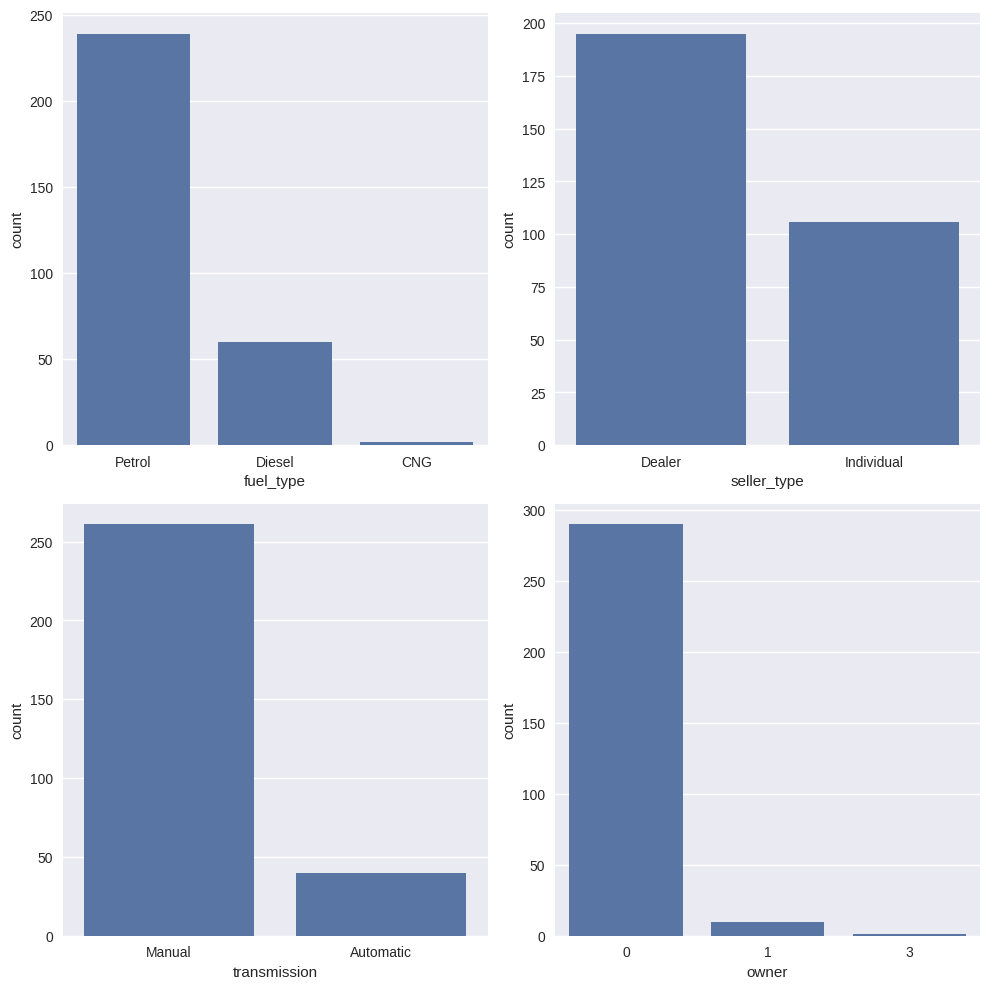

In [46]:
plt.figure(figsize=(10,10))
for i in range(len(clm)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=clm[i], data=da)
plt.tight_layout()

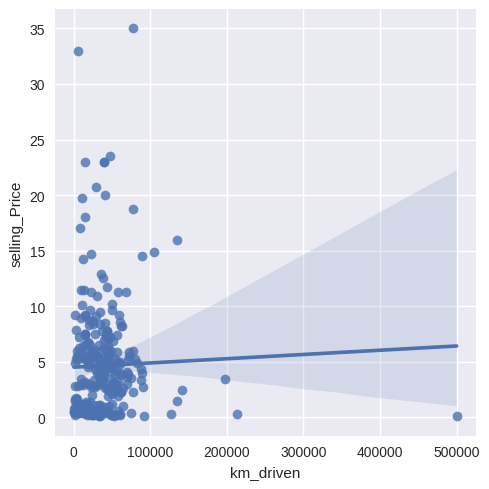

In [47]:
#Comparing the selling price with no of km's driven
sns.lmplot(x='km_driven',y='selling_Price',data=da)

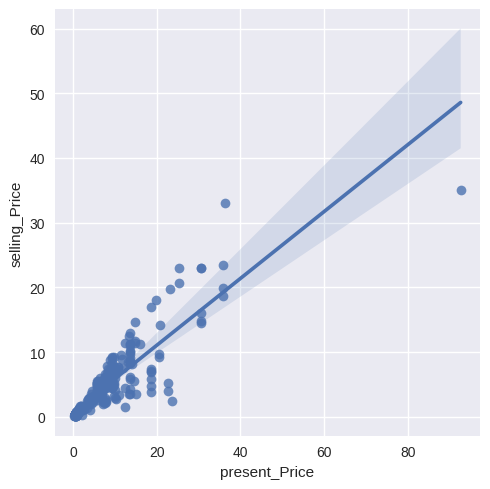

In [48]:
#Comparing the selling price with present price of the car
sns.lmplot(x='present_Price',y='selling_Price',data=da)

In [49]:
#heat map of the present data
#sns.heatmap(da.corr(),annot=True)
#plt.title("WIthout dummis")

In [50]:
#data with age column added
data=da
da

,name,selling_Price,present_Price,km_driven,fuel_type,seller_type,transmission,owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [51]:
da.drop(labels='name',axis= 1, inplace = True) #dropping name column

In [52]:
da=pd.get_dummies(da) #getting dummies

In [53]:
#data with added dummy variables
da

,selling_Price,present_Price,km_driven,owner,Age,fuel_type_CNG,fuel_type_Diesel,fuel_type_Petrol,seller_type_Dealer,seller_type_Individual,transmission_Automatic,transmission_Manual
0,3.35,5.59,27000,0,8,False,False,True,True,False,False,True
1,4.75,9.54,43000,0,9,False,True,False,True,False,False,True
2,7.25,9.85,6900,0,5,False,False,True,True,False,False,True
3,2.85,4.15,5200,0,11,False,False,True,True,False,False,True
4,4.60,6.87,42450,0,8,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,False,True,False,True,False,False,True
297,4.00,5.90,60000,0,7,False,False,True,True,False,False,True
298,3.35,11.00,87934,0,13,False,False,True,True,False,False,True
299,11.50,12.50,9000,0,5,False,True,False,True,False,False,True


<Axes: title={'center': 'Correlation with dummies'}>

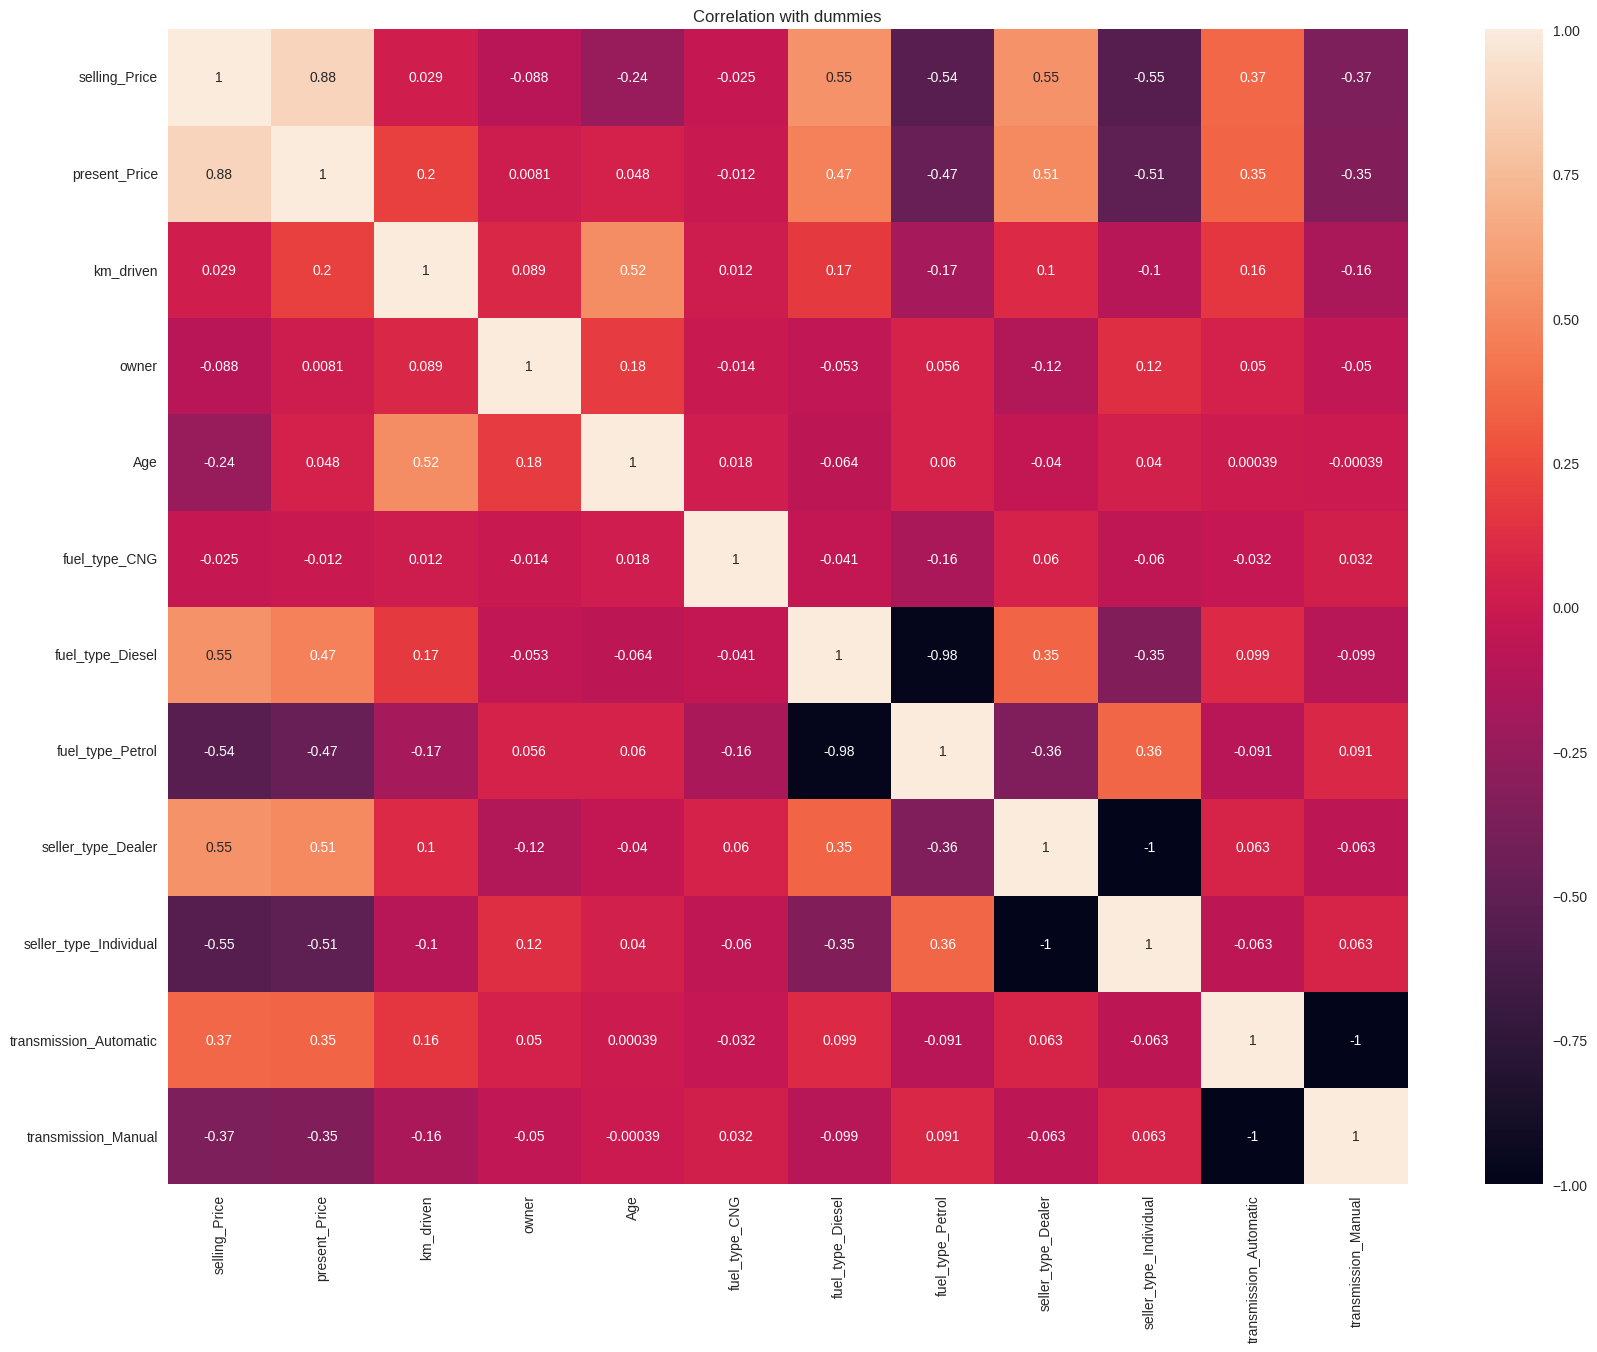

In [54]:
#heat map of the data after adding dummy values
plt.figure(figsize=(20,15))
plt.title("Correlation with dummies")
sns.heatmap(da.corr(),annot=True)

# Splitting the data

In [55]:
#excluding the selling price in the table(comparing the selling price with entire data set attributes)
X=da.drop('selling_Price',axis=1)
Y=da['selling_Price']

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
print("X_train: ",X_train.shape)
print("Y_train: ",Y_train.shape)
print("X_test: ",X_test.shape)
print("Y_test: ",Y_test.shape)

X_train:  (240, 11)
Y_train:  (240,)
X_test:  (61, 11)
Y_test:  (61,)


In [57]:
#using minmax scaler(taking the values in b/w 0's and 1's)
Scr=MinMaxScaler()
X_train=Scr.fit_transform(X_train)

In [58]:
X_test=Scr.transform(X_test)

# Appling regression

# Linear Regression

In [59]:
#defining required variables
r2_sc_train=[]
r2_sc_test=[]
#corss validation
crv=[]

mae=[]#mean absolute error
mse=[]#mean square error
rmse=[]#root mean squared error


In [60]:
#Appling linear regression
linear_reg=LinearRegression()
linear_reg.fit(X_train,Y_train)

LinearRegression()

In [61]:
#getting r2 score of train set
Y_pd_tr=linear_reg.predict(X_train)
r2_tr_mod=r2_score(Y_train,Y_pd_tr)
r2_sc_train.append(round(r2_tr_mod,4))

In [62]:
#getting r2 score of test set
Y_pd_te=linear_reg.predict(X_test)
r2_te_mod=r2_score(Y_test,Y_pd_te)
r2_sc_test.append(round(r2_te_mod,4))

In [63]:
#squre mean of train set(cross validation)
cr_v=cross_val_score(linear_reg,X_train,Y_train,cv=5)
crv_mean=cr_v.mean()
crv.append(round(crv_mean,4))

In [64]:
#printing results of r2 scores,cv,metrics
print("r2 score of train set :",round(r2_tr_mod,4))
print("r2 score of test set :",round(r2_te_mod,4))
print("cross validation mean score :",round(crv_mean,4))

r2 score of train set : 0.8887
r2 score of test set : 0.849
cross validation mean score : 0.8504


In [65]:
#regression metrics
mae_reg = metrics.mean_absolute_error(Y_test, Y_pd_te)
mae.append(round(mae_reg,4))
mse_reg = metrics.mean_squared_error(Y_test, Y_pd_te)
mse.append(round(mse_reg,4))
rmse_reg = np.sqrt(metrics.mean_squared_error(Y_test, Y_pd_te))
rmse.append(round(rmse_reg,4))

In [66]:
print('Mean Absolute Error:', round(mae_reg,4))
print('Mean Squared Error:', round(mse_reg,4))
print('Root Mean Squared Error:', round(rmse_reg,4))

Mean Absolute Error: 1.2162
Mean Squared Error: 3.4788
Root Mean Squared Error: 1.8652


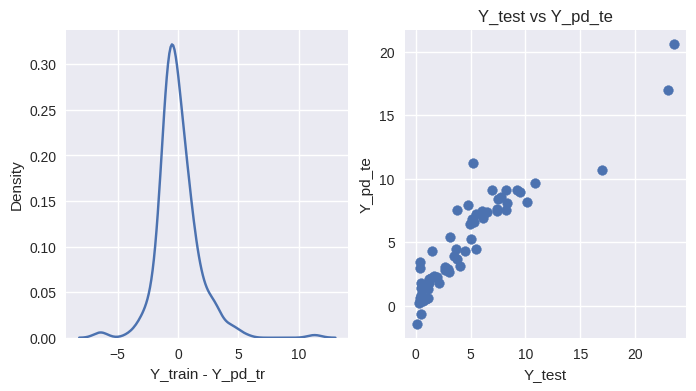

In [67]:
# plotting the trained and tested data
Y_pd_tr=linear_reg.predict(X_train)
Y_pd_te=linear_reg.predict(X_test)
fig, ax = plt.subplots(1,2,figsize = (8,4))
sns.distplot((Y_train-Y_pd_tr),hist = False,ax = ax[0])
ax[0].set_xlabel('Y_train - Y_pd_tr')

# Y_test vs Y_train scatter plot
ax[1].set_title('Y_test vs Y_pd_te')
ax[1].scatter(x=Y_test, y=Y_pd_te)
ax[1].set_xlabel('Y_test')
ax[1].set_ylabel('Y_pd_te')
plt.show()
import warnings
warnings.filterwarnings('ignore')

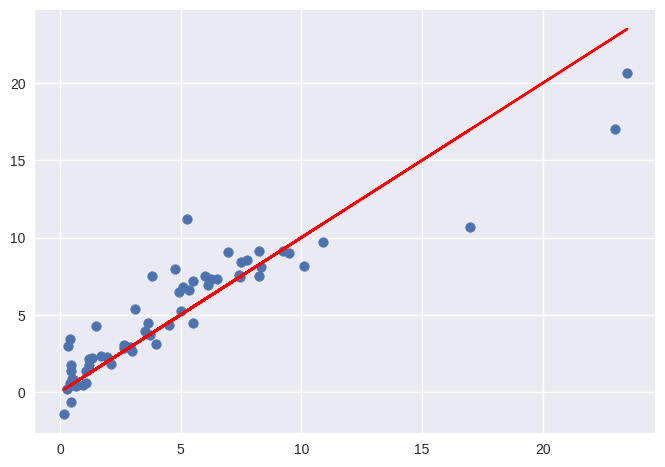

In [68]:
predictions=linear_reg.predict(X_test)
plt.scatter(Y_test,predictions)
plt.plot(Y_test,Y_test,'r')
plt.show()
import warnings
warnings.filterwarnings('ignore')

In [100]:
data

,selling_Price,present_Price,km_driven,fuel_type,seller_type,transmission,owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [108]:
new_car=da.iloc[297]
new_car

selling_Price               4.0
present_Price               5.9
km_driven                 60000
owner                         0
Age                           7
fuel_type_CNG             False
fuel_type_Diesel          False
fuel_type_Petrol           True
seller_type_Dealer         True
seller_type_Individual    False
transmission_Automatic    False
transmission_Manual        True
Name: 297, dtype: object

In [114]:
new_car=da.drop('selling_Price',axis=1).iloc[297]
new_car

present_Price               5.9
km_driven                 60000
owner                         0
Age                           7
fuel_type_CNG             False
fuel_type_Diesel          False
fuel_type_Petrol           True
seller_type_Dealer         True
seller_type_Individual    False
transmission_Automatic    False
transmission_Manual        True
Name: 297, dtype: object

In [115]:
X_train[0].shape

(11,)

In [116]:
new_car=Scr.transform(new_car.values.reshape(-1,11))

In [117]:
linear_reg.predict(new_car)

array([4.21883455])

In [118]:
da.iloc[297].selling_Price

4.0